# Microsoft Movie Analysis Data

In [2]:
import pandas as pd

## Import Title Basics and Ratings
Importing this data from the IMBD movie website creates the basis of our knowledge. This data set provides a set of movies with their title, genre, and rating.

In [3]:
title_basics = pd.read_csv('imdb.title.basics.csv.gz')

In [4]:
title_basics.info()
title_basics = title_basics.dropna()
title_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [5]:
title_basics.value_counts('genres')

genres
Documentary                   24672
Drama                         15725
Comedy                         6413
Comedy,Drama                   3163
Horror                         2975
                              ...  
Documentary,Fantasy,Sci-Fi        1
History,News,War                  1
Adventure,Animation,Crime         1
Drama,Mystery,Sport               1
Adventure,History,Music           1
Length: 1040, dtype: int64

In [6]:
title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

##### Merge the two data sets together so all the data is one data frame and is easily accessable.

In [7]:
frames = [title_ratings, title_basics]
ratings_basics = pd.merge(frames[0], frames[1], how = 'right',  on = ['tconst'])
ratings_basics

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77.0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43.0,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517.0,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,6.5,119.0,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,NaN,NaN,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...,...,...
112227,tt9916160,6.5,11.0,Drømmeland,Drømmeland,2019,72.0,Documentary
112228,tt9916170,NaN,NaN,The Rehearsal,O Ensaio,2019,51.0,Drama
112229,tt9916186,NaN,NaN,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112230,tt9916190,NaN,NaN,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


#### Data Cleaning

In [8]:
ratings_basics = ratings_basics.drop(columns = 'original_title')

In [9]:
ratings_basics = ratings_basics.dropna()

In [10]:
ratings_basics['numvotes'].describe()

count    6.572000e+04
mean     3.954674e+03
std      3.208823e+04
min      5.000000e+00
25%      1.600000e+01
50%      6.200000e+01
75%      3.520000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [11]:
ratings_basics['runtime_minutes'].describe()

count    65720.000000
mean        94.732273
std        209.377017
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [12]:
ratings_basics = ratings_basics.loc[ratings_basics['runtime_minutes'] >= 40] 
#any movie shorter than 40 minutes is considered a short film

In [13]:
#Data goes from 2010 to 2019
ratings_basics['start_year'].describe()

count    65430.000000
mean      2014.257420
std          2.600362
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2019.000000
Name: start_year, dtype: float64

In [14]:
movies_df = ratings_basics #change name to something easier 

## Merge More Data
Taking the qualitative and quantitative data to make one data frame.

In [15]:
import numpy as np

In [16]:
budg= pd.read_csv('tn.movie_budgets.csv.gz')
budg['production_budget']=budg['production_budget'].str.replace(',','')
budg['domestic_gross']=budg['domestic_gross'].str.replace(',','')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace(',','')
budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')
#made sure the data was all integers in order for it to be able to sorted and analyzed
budg['net_pre_marketing']=budg['worldwide_gross']-budg['production_budget']
#made this column to indicate the best of my abilities the net profit
#it is unclear if advertising money is included(though i'm assuming it is not)
budg['domestic/world']=budg['domestic_gross']/budg['worldwide_gross']
#made this money to detirmine what percentage of worldwide earning were domestic
budg=budg.dropna()
budg['earnings/cost_ratio']=budg['net_pre_marketing']/budg['production_budget']
#this works as a percentage the movie recouperated its production budget
budg['year_released']=budg['release_date'].str[-4:].astype('int64')
#made a new column which
budg.drop(budg[budg['year_released'] < 2010].index, inplace = True)
budg.sort_values('worldwide_gross')
budg['Profitable?']= np.where(budg['earnings/cost_ratio']>= 1, True, False)
budget_df = budg.sort_values('earnings/cost_ratio')
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
5302,3,"Dec 11, 2015",American Hero,1000000,0,26,-999974,0.000000,-0.999974,2015,False
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828,-6599172,1.000000,-0.999875,2010,False
3818,19,"May 8, 2015",Skin Trade,9000000,1242,1242,-8998758,1.000000,-0.999862,2015,False
5335,36,"Nov 21, 2014",Food Chains,913000,0,176,-912824,0.000000,-0.999807,2014,False
3161,62,"Sep 1, 2015",Broken Horses,15000000,0,3471,-14996529,0.000000,-0.999769,2015,False
...,...,...,...,...,...,...,...,...,...,...,...
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,0.477449,58.170677,2010,True
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,0.509439,63.364198,2015,True
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,0.540790,65.580591,2011,True
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,0.523420,100.759490,2012,True


In [17]:
frames = [movies_df , budget_df]
mega_df = pd.merge(frames[0].rename(columns={'primary_title': 'movie'}), frames[1], how = 'left',  on = ['movie'])

### Data Cleaning 

In [18]:
mega_table = mega_df.dropna()

In [19]:
mega_table = mega_table.set_index('movie')
mega_table

,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
movie,,,,,,,,,,,,,,,,
Foodfight!,tt0249516,1.9,8248.0,2012,91.0,"Action,Animation,Comedy",26.0,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,-4.492629e+07,0.000000,-0.998362,2012.0,False
On the Road,tt0337692,6.1,37886.0,2012,124.0,"Adventure,Drama,Romance",17.0,"Mar 22, 2013",25000000.0,720828.0,9.313302e+06,-1.568670e+07,0.077398,-0.627468,2013.0,False
The Secret Life of Walter Mitty,tt0359950,7.3,275300.0,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,9.686118e+07,0.309999,1.064409,2013.0,True
A Walk Among the Tombstones,tt0365907,6.5,105116.0,2014,114.0,"Action,Crime,Drama",67.0,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,3.410859e+07,0.418906,1.218164,2014.0,True
Jurassic World,tt0369610,7.0,539338.0,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unstoppable,tt9225192,6.5,576.0,2018,116.0,"Action,Crime",19.0,"Nov 12, 2010",95000000.0,81562942.0,1.657209e+08,7.072092e+07,0.492170,0.744431,2010.0,False
Neighbors,tt9392532,7.6,18.0,2018,90.0,"Comedy,Drama",64.0,"May 9, 2014",18000000.0,150086800.0,2.709444e+08,2.529444e+08,0.553939,14.052468,2014.0,True
The Gambler,tt9447594,6.1,10.0,2019,121.0,"Action,Sci-Fi,Thriller",25.0,"Dec 10, 2014",25000000.0,33680992.0,3.871803e+07,1.371803e+07,0.869905,0.548721,2014.0,False


In [146]:
mega_table.to_csv('Merge_mega_table2.csv')

## Creating Visuals 

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Narrow down data to be able to compare data effectively 

In [148]:
top_20_genres = mega_table.value_counts('genres').head(20)

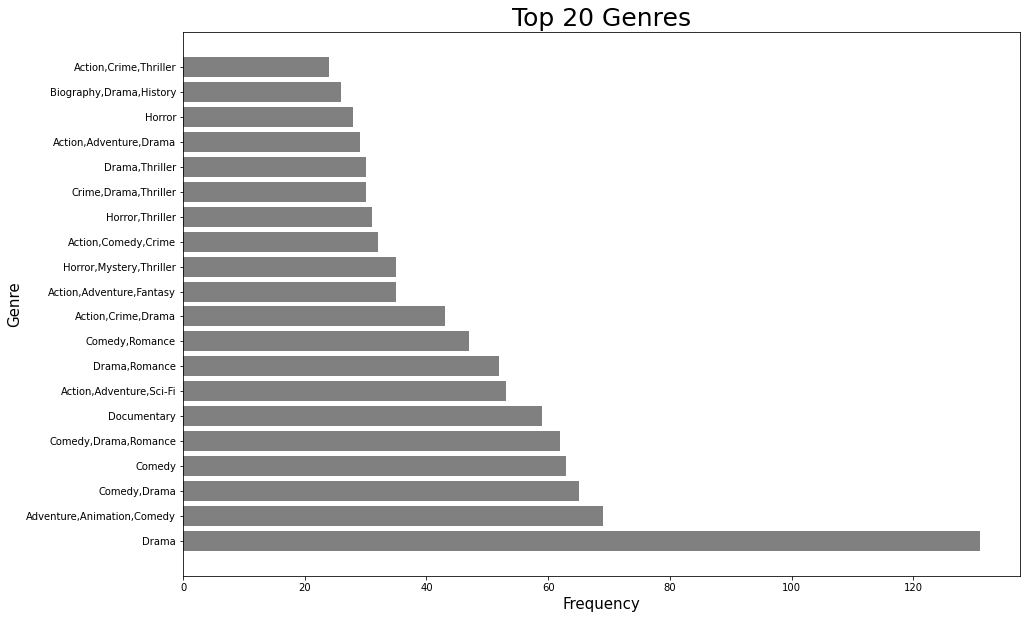

In [149]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(top_20_genres.index,top_20_genres, color = 'grey')

ax.set_title('Top 20 Genres', fontsize=25)

ax.set_ylabel('Genre', fontsize=15)
ax.set_xlabel('Frequency', fontsize=15);

Looking at the graph we can see that drama is by far the most popular genre. This does not necessarily tell us anything but helps give us a starting point of where we want to start.

### Narrow Down Data- More specifics

In [150]:
top20_genres = top_20_genres.index
individual_genres = pd.Series(top20_genres.str.split(',')).explode().unique()
individual_genres

array(['Drama', 'Adventure', 'Animation', 'Comedy', 'Romance',
       'Documentary', 'Action', 'Sci-Fi', 'Crime', 'Fantasy', 'Horror',
       'Mystery', 'Thriller', 'Biography', 'History'], dtype=object)

In [151]:
genre_tables = {}
for genre in top20_genres:
    frame = mega_table[mega_table.genres.str.contains(genre)]
    genre_tables[genre] = frame

In [152]:
horror_table = genre_tables['Horror']
horror_table

,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
movie,,,,,,,,,,,,,,,,,
The Possession,tt0431021,5.9,53649.0,2012,92.0,"Horror,Mystery,Thriller",81.0,"Aug 31, 2012",14000000.0,49130588.0,82925064.0,68925064.0,0.592470,4.923219,2012.0,True,Aug
The Crazies,tt0455407,6.5,104465.0,2010,101.0,"Horror,Thriller",36.0,"Feb 26, 2010",19000000.0,39123589.0,56445534.0,37445534.0,0.693121,1.970818,2010.0,True,Feb
Piranha 3D,tt0464154,5.4,81327.0,2010,88.0,"Comedy,Horror",52.0,"Aug 20, 2010",24000000.0,25003155.0,83660160.0,59660160.0,0.298866,2.485840,2010.0,True,Aug
Rings,tt0498381,4.5,34151.0,2017,102.0,"Drama,Horror,Mystery",38.0,"Feb 3, 2017",25000000.0,27793018.0,82917283.0,57917283.0,0.335190,2.316691,2017.0,True,Feb
The Wolfman,tt0780653,5.8,97873.0,2010,103.0,"Drama,Fantasy,Horror",91.0,"Feb 12, 2010",150000000.0,62189884.0,142634358.0,-7365642.0,0.436009,-0.049104,2010.0,False,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Promise,tt7232438,6.1,629.0,2017,114.0,"Drama,Horror,Thriller",78.0,"Apr 21, 2017",90000000.0,8224288.0,10551417.0,-79448583.0,0.779449,-0.882762,2017.0,False,Apr
Phantom,tt7598276,8.2,37.0,2018,106.0,"Crime,Horror,Thriller",43.0,"Mar 1, 2013",18000000.0,1034589.0,1199510.0,-16800490.0,0.862510,-0.933361,2013.0,False,Mar
Hereditary,tt7784604,7.3,151571.0,2018,127.0,"Drama,Horror,Mystery",56.0,"Jun 8, 2018",10000000.0,44069456.0,70133905.0,60133905.0,0.628362,6.013390,2018.0,True,Jun


In [164]:
action_table = genre_tables['Action']
action_table

,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
movie,,,,,,,,,,,,,,,,,
Foodfight!,tt0249516,1.9,8248.0,2012,91.0,"Action,Animation,Comedy",26.0,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,-4.492629e+07,0.000000,-0.998362,2012.0,False,Dec
A Walk Among the Tombstones,tt0365907,6.5,105116.0,2014,114.0,"Action,Crime,Drama",67.0,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,3.410859e+07,0.418906,1.218164,2014.0,True,Sep
Jurassic World,tt0369610,7.0,539338.0,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True,Jun
John Carter,tt0401729,6.6,241792.0,2012,132.0,"Action,Adventure,Sci-Fi",14.0,"Mar 9, 2012",275000000.0,73058679.0,2.827781e+08,7.778100e+06,0.258360,0.028284,2012.0,False,Mar
The A-Team,tt0429493,6.8,235256.0,2010,117.0,"Action,Adventure,Thriller",32.0,"Jun 11, 2010",110000000.0,77222099.0,1.772412e+08,6.724117e+07,0.435689,0.611283,2010.0,False,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Abduction,tt7867360,6.1,1592.0,2019,106.0,"Action,Sci-Fi",96.0,"Sep 23, 2011",35000000.0,28087155.0,8.664836e+07,5.164836e+07,0.324151,1.475667,2011.0,True,Sep
Dragon Ball Super: Broly,tt7961060,8.0,16465.0,2018,100.0,"Action,Adventure,Animation",36.0,"Jan 16, 2019",8500000.0,30376755.0,1.227478e+08,1.142478e+08,0.247473,13.440912,2019.0,True,Jan
Teefa in Trouble,tt8043306,7.4,2724.0,2018,155.0,"Action,Comedy,Crime",8.0,"Jul 20, 2018",1500000.0,0.0,9.880600e+04,-1.401194e+06,0.000000,-0.934129,2018.0,False,Jul


##### Create parameters for data on Horror and Action movie tags

After doing some outside research, narrowing down the movies by number of votes helps to eliminate movies that are irrevelent to the dataframe. Number of votes is an indicator of how popular the movie is based on the reviews left by people on the IMBD movie website.

In [171]:
#top_genres = mega_table.loc[mega_table['genres'].isin(top20_genres)]

In [170]:
horror_table = horror_table.loc[horror_table['numvotes'] >= 10000]

In [169]:
action_table = action_table.loc[action_table['numvotes'] >= 10000]

##### Create CSV of Action and Horror Tables to share 

In [91]:
action_table.to_csv('action_table.csv') 

In [92]:
horror_table.to_csv('horror_table.csv')

# 

# Break data into periods 
Data is broken into 3 periods to see if there the time of the year has any impact on the profit of the genre of movie.

In [172]:
#sorting data by month 
mega_table['month_released'] = mega_table['release_date'].str[:3]


In [173]:
period_1 = ['Jan', 'Feb', 'Mar', 'Apr']
period_1_df = mega_table.loc[mega_table['month_released'].isin(period_1)]


In [174]:
#period_2 = ['May', 'Jun', 'Jul', 'Aug']
#period_2_df = mega_table.loc[mega_table['month_released'].isin(period_2)]
#period_2_df

In [175]:
period_3 = ['Sep', 'Oct', 'Nov', 'Dec']
period_3_df = mega_table.loc[mega_table['month_released'].isin(period_3)]

In [176]:
period_3_df = period_3_df.loc[period_3_df['numvotes'] >= 10000]

In [177]:
#period_2_df = period_2_df.loc[period_2_df['numvotes'] >= 10000]
#period_2_df

In [178]:
period_1_sorted=period_1_df.value_counts('genres').head(20)
period_1_genres=period_1_sorted.index
period_1 = period_1_df.loc[period_1_df['genres'].isin(period_1_genres)]

# Period 1 Data

#### Earnings Per Cost Ratio

In [179]:
period_1['ec_ratio'] = period_1['earnings/cost_ratio']

<ipython-input-179-7fa078df41f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_1['ec_ratio'] = period_1['earnings/cost_ratio']


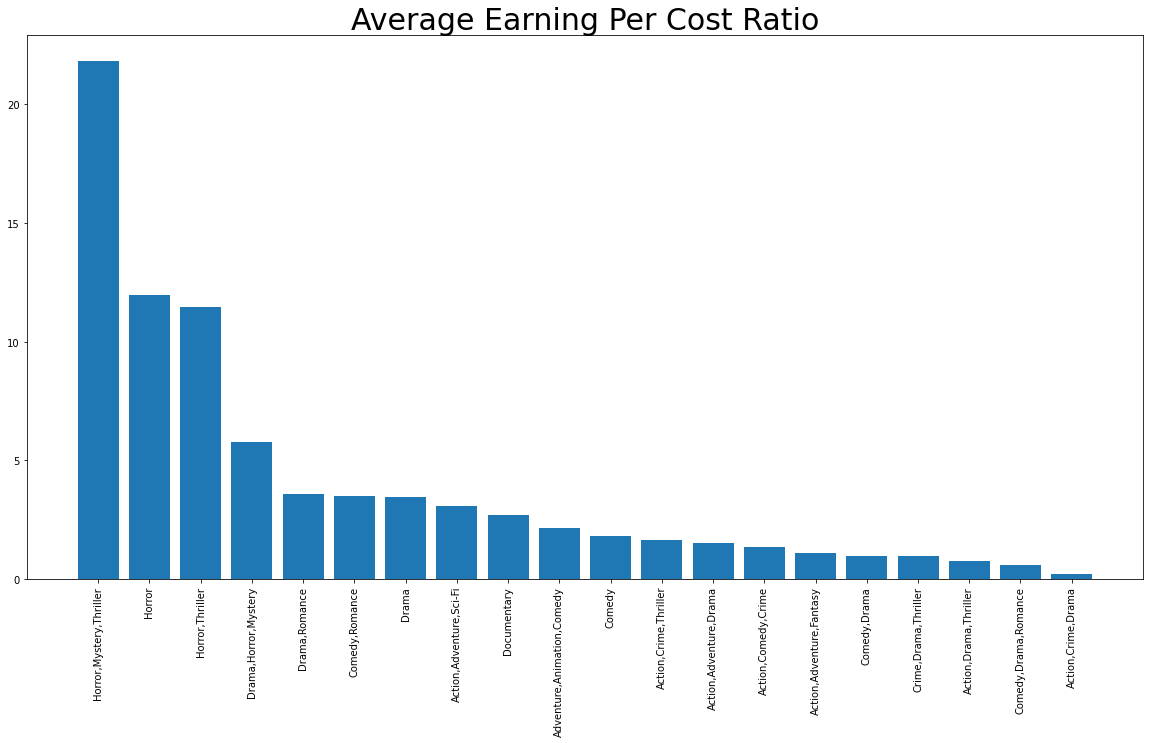

In [180]:
genre_dict2=dict(period_1.groupby('genres').ec_ratio.mean())
sort_genre_mean2 = sorted(genre_dict2.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2=dict(sort_genre_mean2)
genre_mean_sorted2
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted2.keys(),genre_mean_sorted2.values())
plt.xticks(rotation=90)
plt.title('Average Earning Per Cost Ratio', fontsize = 30);

### World Wide Gross Income
The world wide gross income of the top 20 genres of the period 

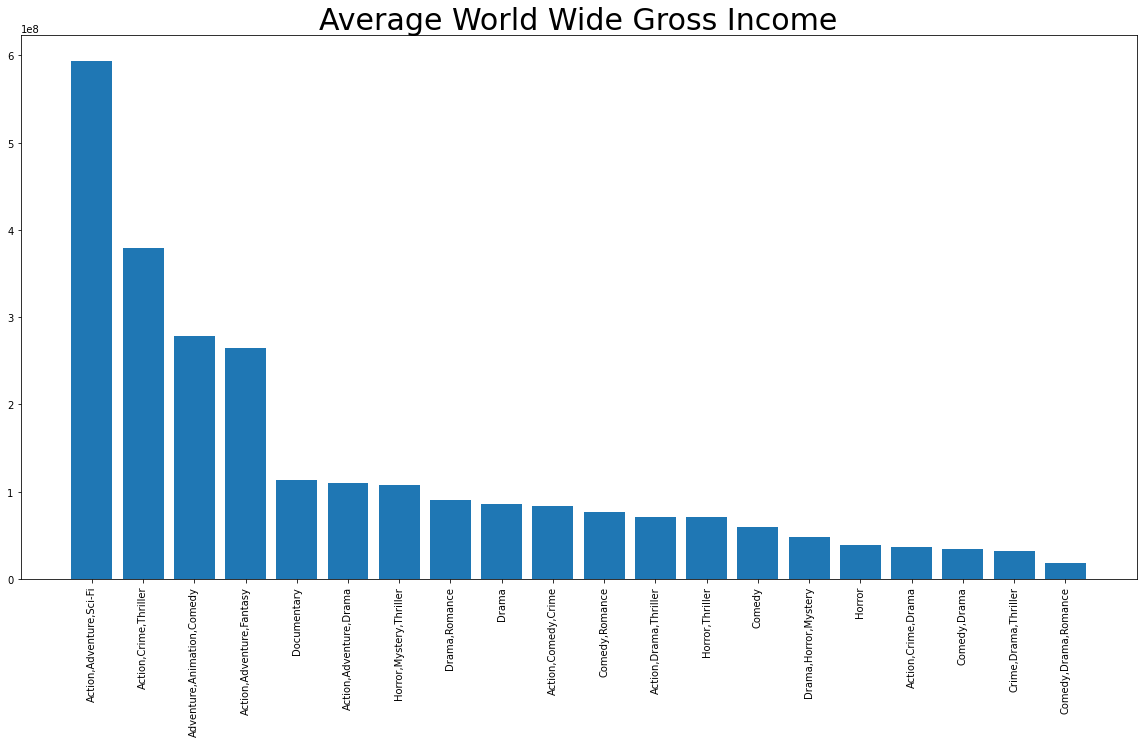

In [181]:
genre_dict3=dict(period_1.groupby('genres').worldwide_gross.mean())
sort_genre_mean3 = sorted(genre_dict3.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted3=dict(sort_genre_mean3)
genre_mean_sorted3
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted3.keys(),genre_mean_sorted3.values())
plt.xticks(rotation=90)
plt.title('Average World Wide Gross Income', fontsize = 30);

## Net Profit 
Net profit before the cost of marketing of the top 20 genres in period 1

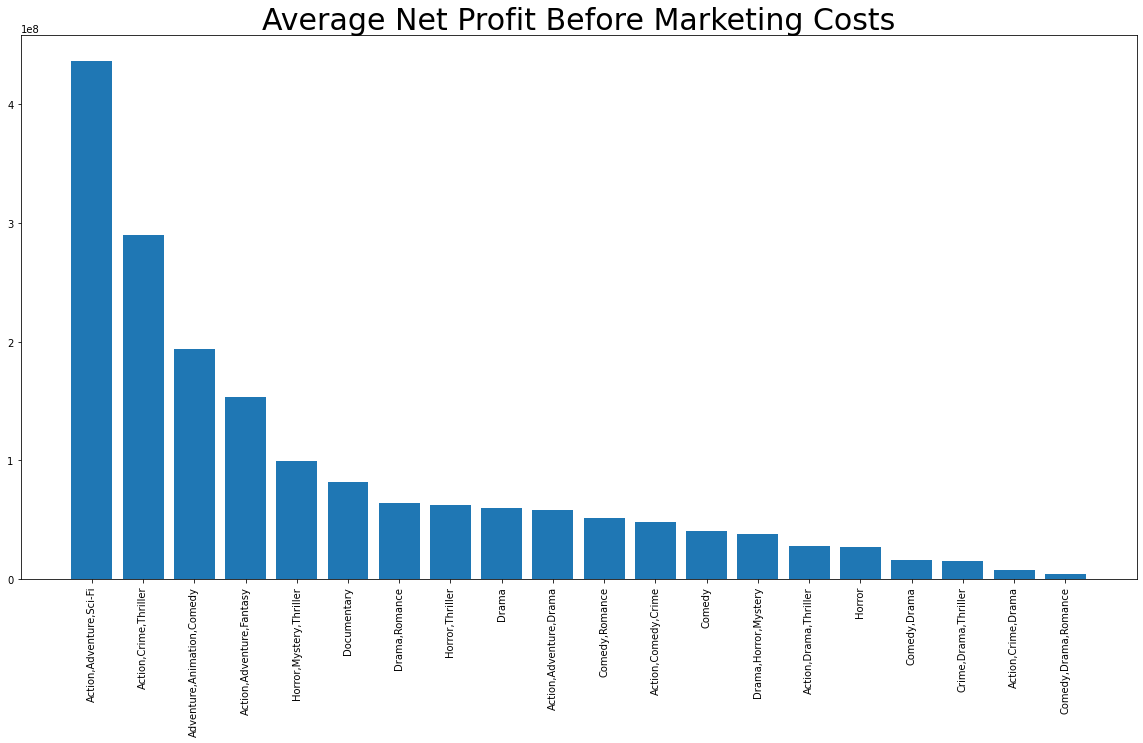

In [182]:
genre_dict4=dict(period_1.groupby('genres').net_pre_marketing.mean())
sort_genre_mean4 = sorted(genre_dict4.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted4=dict(sort_genre_mean4)
genre_mean_sorted4
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted4.keys(),genre_mean_sorted4.values())
plt.xticks(rotation=90)
plt.title('Average Net Profit Before Marketing Costs', fontsize = 30);

# Period 3 Data 

## Earnings Per Cost Ratio

In [183]:
period_3_sorted=period_3_df.value_counts('genres').head(20)
period_3_genres=period_3_sorted.index
period_3 = period_3_df.loc[period_3_df['genres'].isin(period_3_genres)]

In [184]:
period_3['ec_ratio'] = period_3['earnings/cost_ratio']

<ipython-input-184-2d5cc72b8943>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_3['ec_ratio'] = period_3['earnings/cost_ratio']


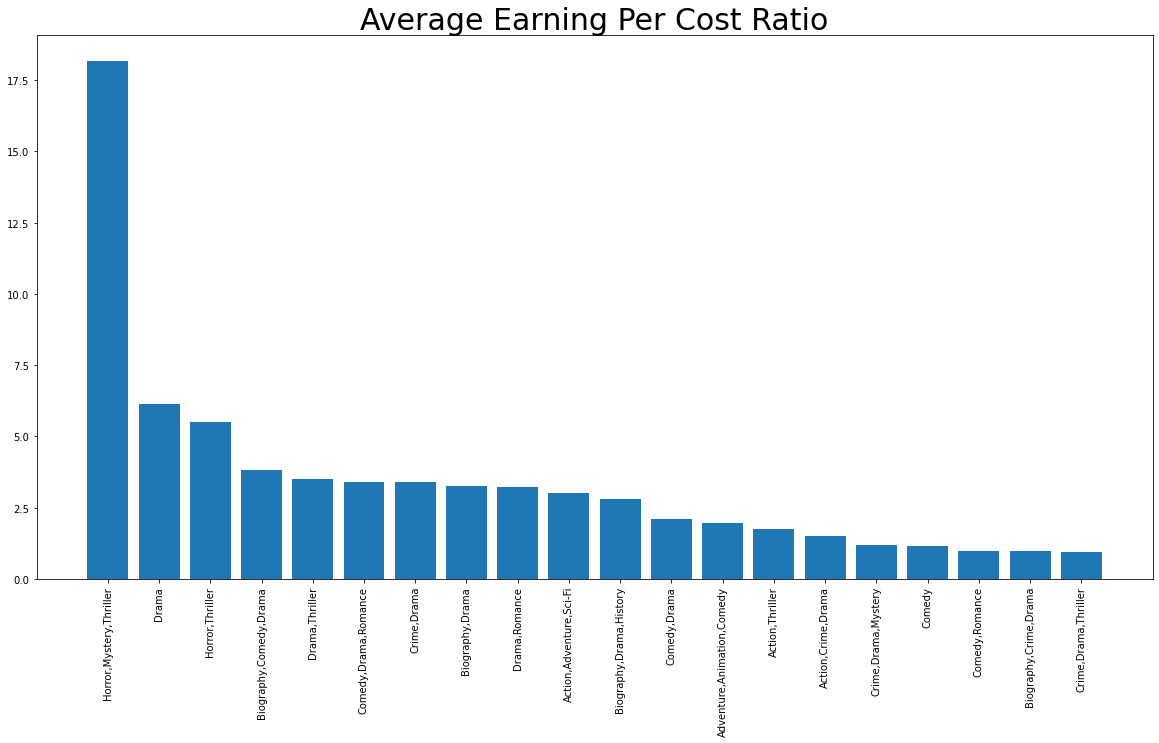

In [185]:
genre_dict5=dict(period_3.groupby('genres').ec_ratio.mean())
sort_genre_mean5 = sorted(genre_dict5.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted5=dict(sort_genre_mean5)
genre_mean_sorted5
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted5.keys(),genre_mean_sorted5.values())
plt.xticks(rotation=90)
plt.title('Average Earning Per Cost Ratio', fontsize = 30);

## World Wide Gross Income 

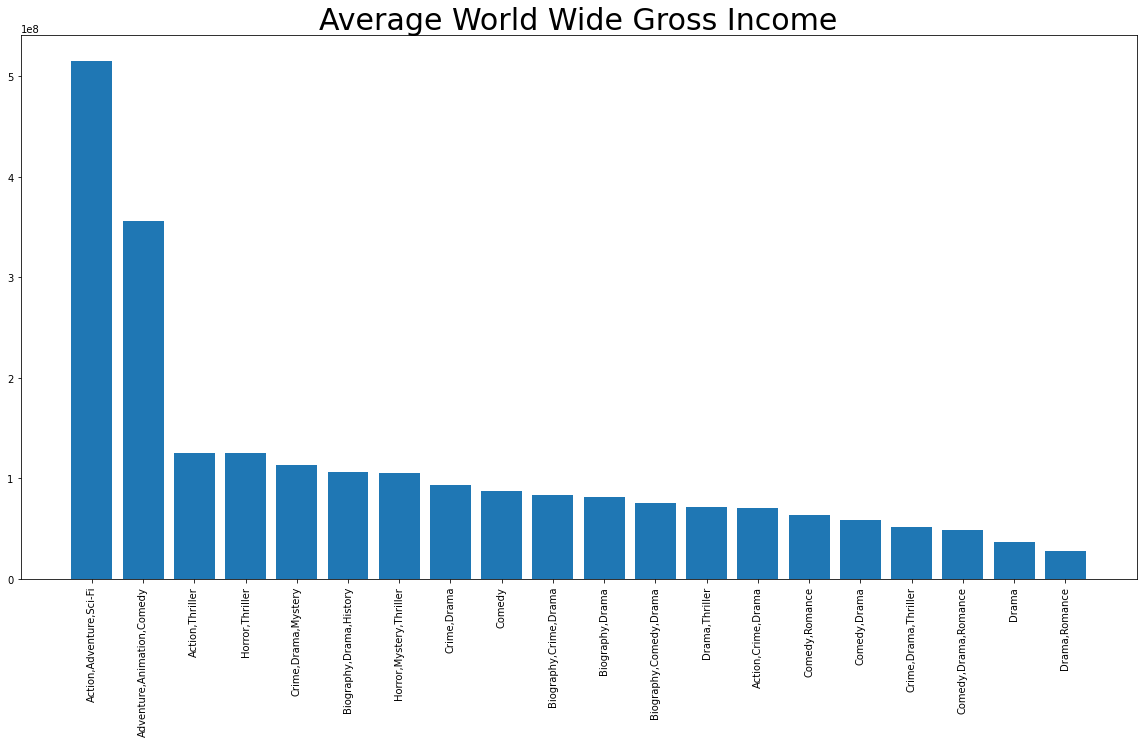

In [186]:
genre_dict6=dict(period_3.groupby('genres').worldwide_gross.mean())
sort_genre_mean6 = sorted(genre_dict6.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted6=dict(sort_genre_mean6)
genre_mean_sorted6
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted6.keys(),genre_mean_sorted6.values())
plt.xticks(rotation=90)
plt.title('Average World Wide Gross Income', fontsize = 30);

## Net Profit 

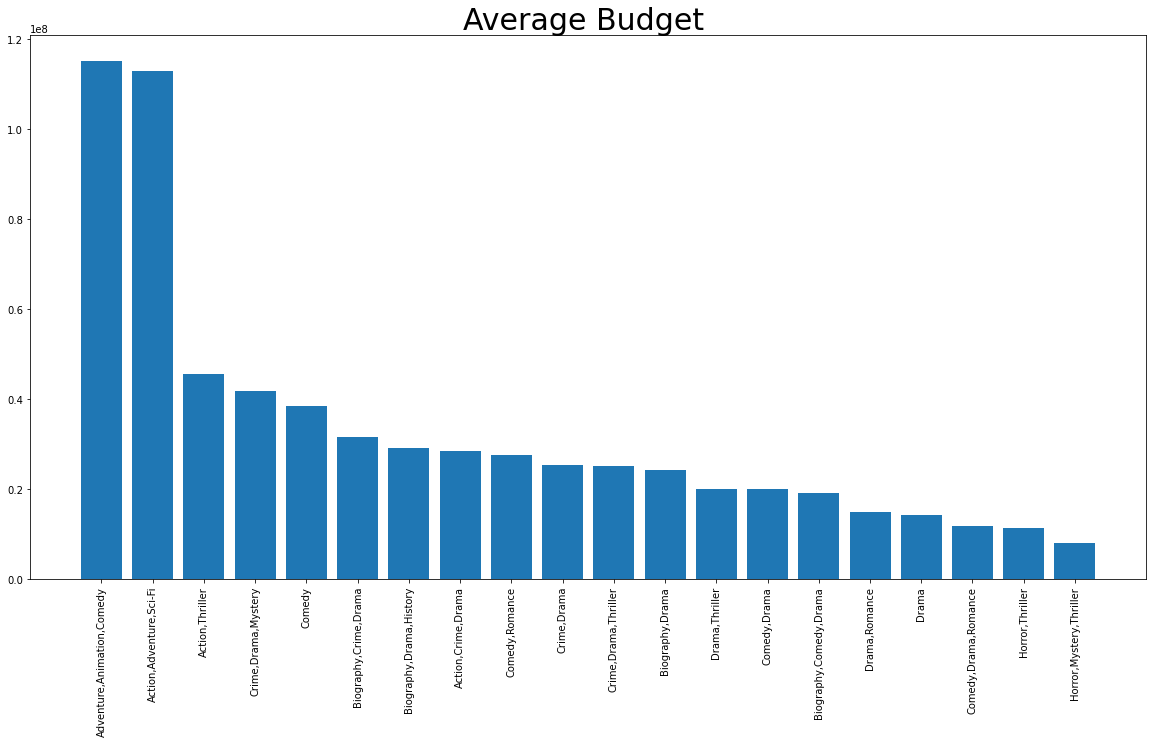

In [187]:
genre_dict7=dict(period_3.groupby('genres').production_budget.mean())
sort_genre_mean7 = sorted(genre_dict7.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted7=dict(sort_genre_mean7)
genre_mean_sorted7
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted7.keys(),genre_mean_sorted7.values())
plt.xticks(rotation=90)
plt.title('Average Budget ', fontsize = 30);